# Project2 - Host program

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import time

from pynq import Overlay
import pynq.lib.dma
from pynq import Xlnk
from pynq import MMIO

o1 = Overlay('/home/xilinx/jupyter_notebooks/detector/detector.bit')
# Download your bitstream to FPGA
t_before_bitstream = time.time()
o1.download()
t_after_bitstream = time.time()

print(t_after_bitstream - t_before_bitstream, 'seconds to program bitstream')

0.2971155643463135 seconds to program bitstream


In [20]:
dmaIR = ol.streamPh.dma_I_R # First DMA
dmaQT = ol.streamPh.dma_Q_T # Second DMA
ph_ip = ol.streamPh.phasedetector # Your IP

xlnk = Xlnk() # Contiguous Memory Allocator (CMA)

NameError: name 'ol' is not defined

In [21]:
length = 1024

# Open input/output files
fI = open('input_i.dat','r')
fQ = open('input_q.dat','r')
fG = open('out_gold.dat', 'r')

# Allocate regular numpy arrays to store input and output
inp_I = np.empty([length,], dtype=np.float32)
inp_Q = np.empty([length,], dtype=np.float32)
golden_R = np.empty([length,], dtype=np.float32)
golden_T = np.empty([length,], dtype=np.float32)

# Store data into arrays
for i in range (0, length):
    golden_R[i], golden_T[i] = [np.float32(x) for x in next(fG).split()]
    inp_I[i] = np.float32(next(fI))
    inp_Q[i] = np.float32(next(fQ))

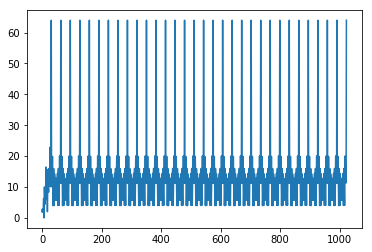

In [22]:
plt.plot(golden_R)

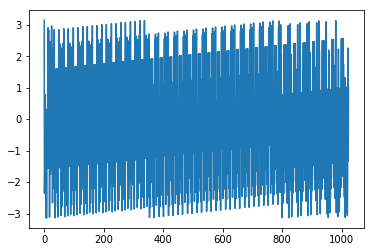

In [23]:
plt.plot(golden_T)

In [24]:
print("Golden thetas at the R peaks are:\n {}\n {}\n {}\n {}\n {}\n {}\n {}\n {}\n {}\n {}\n {}\n {}\n {}\n {}\n {}\n {}\n".format(golden_T[31],golden_T[63],golden_T[95],golden_T[127],golden_T[159],golden_T[191],golden_T[223],golden_T[255],golden_T[287],golden_T[319],golden_T[351],golden_T[383],golden_T[415],golden_T[447],golden_T[479],golden_T[511]))

Golden thetas at the R peaks are:
 0.015529000200331211
 0.047508999705314636
 0.07948499917984009
 0.1115259975194931
 0.1434909999370575
 0.1754709929227829
 0.2074970006942749
 0.23947599530220032
 0.27150198817253113
 0.3034819960594177
 0.3355030119419098
 0.367482990026474
 0.399507999420166
 0.4314880073070526
 0.4635140001773834
 0.49549400806427



## Complete the following block

In [33]:
# Allocate CMA array for DMA
xlnk = Xlnk()
# Copy regular numpy arrays to CMA arrays
dma1 = o1.detector.axi_dma_0
dma2 = o1.detector.axi_dma_1
# Write length using MMIO (we got the address from Vivado)
detector_ip = MMIO(0x43c00000,0x10000)

size = 1024
in_buffer1 = xlnk.cma_array(shape=(size,), dtype=np.float32)
in_buffer2 = xlnk.cma_array(shape=(size,), dtype=np.float32)
out_bufferT = xlnk.cma_array(shape=(size,), dtype=np.float32)
out_bufferR = xlnk.cma_array(shape=(size,), dtype=np.float32)

fI = open('input_i.dat','r')
fQ = open('input_q.dat','r')
fG = open('out_gold.dat', 'r')
for i in range (0, size):
    in_buffer1[i] = np.float32(next(fI))
    in_buffer2[i] = np.float32(next(fQ))
    
detector_ip.write(0x10,size)
t_start = time.time()
# Begin data transfer from/to DMA
dma1.sendchannel.transfer(in_buffer1)
dma2.sendchannel.transfer(in_buffer2)
dma1.recvchannel.transfer(out_bufferT)
dma2.recvchannel.transfer(out_bufferR)
dma1.sendchannel.wait()
dma2.sendchannel.wait()
dma1.recvchannel.wait()
dma2.recvchannel.wait()
t_stop = time.time()

# Free the CMA buffers
in_buffer1.close()
in_buffer2.close()
out_bufferR.close()
out_bufferT.close()

print(t_after_bitstream - t_before_bitstream, 'seconds to execute on hardware')

KeyboardInterrupt: 

In [ ]:
plt.plot(out_bufferR)

In [ ]:
plt.plot(out_bufferT)

In [ ]:
print("Output thetas at the R peaks are:\n {}\n {}\n {}\n {}\n {}\n {}\n {}\n {}\n {}\n {}\n {}\n {}\n {}\n {}\n {}\n {}\n".format(out_bufferT[31],out_bufferT[63],out_bufferT[95],out_bufferT[127],out_bufferT[159],out_bufferT[191],out_bufferT[223],out_bufferT[255],out_bufferT[287],out_bufferT[319],out_bufferT[351],out_bufferT[383],out_bufferT[415],out_bufferT[447],out_bufferT[479],out_bufferT[511]))